# Notebook com a aplicação do modelo 

In [1]:
import pandas as pd
import numpy as np 

In [2]:
dados = pd.read_csv("../data/raw/creditcard.csv")

dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dados["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn import set_config # Pipelines bisualmente bonitos
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

set_config(display = "diagram")

In [5]:
X = dados.drop("Class", axis = 1)

y = dados["Class"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234, stratify = y)

In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(213605, 30) (213605,) (71202, 30) (71202,)


In [7]:
if_model = IsolationForest(n_estimators = 1000, contamination = 0.01)

if_model

IsolationForest(contamination=0.01, n_estimators=1000)

In [8]:
if_model.fit(x_train)

IsolationForest(contamination=0.01, n_estimators=1000)

In [9]:
y_pred_train1 = if_model.predict(x_train)
y_pred_test1 = if_model.predict(x_test)

In [10]:
y_pred_train1 = np.where(y_pred_train1 == -1, 1, 0)
y_pred_test1 = np.where(y_pred_test1 == -1, 1, 0)


In [11]:
print("Percentual de fraudes: {}".format(round(accuracy_score(y_train,y_pred_train1)*100, 2)))

Percentual de fraudes: 99.03


In [12]:
print("Percentual de fraudes: {}".format(round(accuracy_score(y_test,y_pred_test1)*100, 2)))

Percentual de fraudes: 99.08


In [13]:
print("Base de treinamento")
print("Percentual de fraudes: {}".format(round(accuracy_score(y_train,y_pred_train1)*100, 2)))
print("------------------------------")
print("Base de teste")
print("Percentual de fraudes: {}".format(round(accuracy_score(y_test,y_pred_test1)*100, 2)))

Base de treinamento
Percentual de fraudes: 99.03
------------------------------
Base de teste
Percentual de fraudes: 99.08


In [14]:
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    213236
           1       0.10      0.60      0.18       369

    accuracy                           0.99    213605
   macro avg       0.55      0.80      0.59    213605
weighted avg       1.00      0.99      0.99    213605



In [15]:
pd.crosstab(y_train.values.ravel(), y_pred_train1, rownames = ["Verdadeiro"], colnames = ["Predito pelo modelo"], margins = True)

Predito pelo modelo,0,1,All
Verdadeiro,,,
0,211321,1915,213236
1,147,222,369
All,211468,2137,213605


In [16]:
score_samples_if = pd.DataFrame(abs(if_model.score_samples(x_train)))

score_samples_if.head()

,0
0,0.391054
1,0.395282
2,0.364650
3,0.367125
4,0.388283


In [17]:
score_samples_if1 = score_samples_if.rename(columns = {0 : "value"})

score_samples_if1.head()

,value
0,0.391054
1,0.395282
2,0.364650
3,0.367125
4,0.388283


<AxesSubplot:ylabel='Frequency'>

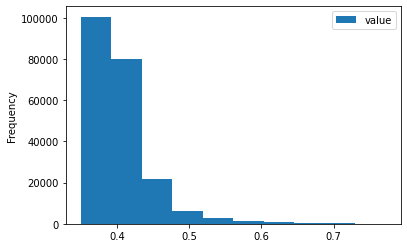

In [18]:
score_samples_if1.plot(kind = "hist")

In [19]:
score_samples_if.min()

0    0.35053
dtype: float64

In [20]:
score_samples_if.max()

0    0.77165
dtype: float64

In [21]:
if_model.offset_

-0.5743822631493328

In [22]:
scaler = MinMaxScaler()

In [23]:
score_samples_if1["value_norm"] = scaler.fit_transform(score_samples_if1)

score_samples_if1.head()

,value,value_norm
0,0.391054,0.096230
1,0.395282,0.106269
2,0.364650,0.033530
3,0.367125,0.039407
4,0.388283,0.089650


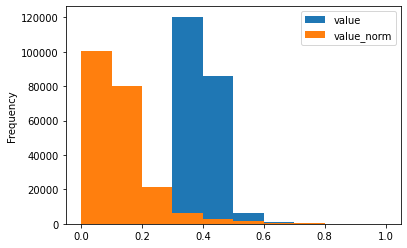

In [24]:
_ = score_samples_if1.plot(kind = "hist")

In [25]:
score_samples_if1[score_samples_if1["value_norm"] > 0.9].sort_values(by = "value_norm")

,value,value_norm
76461,0.731499,0.904657
94130,0.732775,0.907688
179276,0.733110,0.908483
124773,0.733228,0.908763
92329,0.737366,0.918589
11908,0.739495,0.923644
76958,0.739512,0.923685
69542,0.742264,0.930219
152668,0.743137,0.932293
64740,0.743999,0.934341


In [26]:
x_train.iloc[41563,]

Time      142019.000000
V1           -37.558067
V2           -29.335992
V3           -24.962322
V4             8.413616
V5           -35.182120
V6            21.550496
V7            36.877368
V8            -8.915982
V9             5.046566
V10            0.909474
V11            3.919686
V12           -0.384260
V13            4.316156
V14           -3.113694
V15            5.667667
V16            8.289890
V17           -2.490935
V18           -3.570907
V19            1.663899
V20          -28.009635
V21          -11.263235
V22           -1.150828
V23           -7.800902
V24            1.272716
V25            1.965365
V26            0.767817
V27            3.248189
V28           13.013546
Amount      5964.950000
Name: 220090, dtype: float64

In [27]:
dados[dados["Time"] == 142019.000000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
220088,142019.0,0.065125,1.089234,-0.788752,0.362093,1.968970,-0.986444,1.998324,-0.636687,-0.771849,...,0.312959,1.163819,-0.634386,-0.753189,0.411180,-0.183214,-0.023765,-0.065342,1.00,0
220089,142019.0,-1.555130,-0.998918,0.978737,1.090221,1.313982,0.135721,-0.184102,0.360106,0.019500,...,-0.161301,-0.202977,1.284539,0.164964,-0.610922,-0.866827,0.272226,0.124648,34.95,0
220090,142019.0,-37.558067,-29.335992,-24.962322,8.413616,-35.182120,21.550496,36.877368,-8.915982,5.046566,...,-11.263235,-1.150828,-7.800902,1.272716,1.965365,0.767817,3.248189,13.013546,5964.95,0
220091,142019.0,1.815724,-2.223878,-1.127500,-1.580004,-1.306369,0.211408,-1.120743,0.015701,-1.295542,...,0.022084,0.002238,0.039235,0.279890,-0.345998,-0.225234,-0.023660,-0.011814,247.20,0
220092,142019.0,1.988996,-0.356116,-0.392539,0.399902,-0.467295,-0.152771,-0.599601,-0.013016,1.334036,...,0.194558,0.821004,0.138948,0.779871,-0.043499,-0.249151,0.042157,-0.027905,9.99,0
